## Imports

In [24]:
!pip install imblearn


     |██                              | 10 kB 30.6 MB/s eta 0:00:01
     |████                            | 20 kB 36.6 MB/s eta 0:00:01
     |█████▉                          | 30 kB 24.7 MB/s eta 0:00:01
     |███████▉                        | 40 kB 20.2 MB/s eta 0:00:01
     |█████████▉                      | 51 kB 17.9 MB/s eta 0:00:01
     |███████████▊                    | 61 kB 16.1 MB/s eta 0:00:01
     |█████████████▊                  | 71 kB 18.0 MB/s eta 0:00:01
     |███████████████▊                | 81 kB 16.7 MB/s eta 0:00:01
     |█████████████████▋              | 92 kB 16.8 MB/s eta 0:00:01
     |███████████████████▋            | 102 kB 17.5 MB/s eta 0:00:01
     |█████████████████████▋          | 112 kB 17.5 MB/s eta 0:00:01
     |███████████████████████▌        | 122 kB 17.5 MB/s eta 0:00:01
     |█████████████████████████▌      | 133 kB 17.5 MB/s eta 0:00:01
     |███████████████████████████▌    | 143 kB 17.5 MB/s eta 0:00:01
     |█████████████████████████████▍  | 15

In [87]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.Data_Augmentation as Data_Augmentation
import Components.wrapper as wrapper
import Components.two_step_utils as two_step_utils



# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Data_Augmentation)
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(wrapper)
importlib.reload(two_step_utils)

<module 'Components.two_step_utils' from '../Components/two_step_utils.py'>

## Data Preprocessing

### Data Import

In [26]:
X, y = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()

In [27]:
print(X.head())

         x0        x1        x2        x3        x4        x5        x6  \
0 -1.498973  1.448201  2.784979  1.905992  1.285007 -0.571679  1.253798   
1 -0.521470 -0.493049  0.891382 -0.080855  0.227825 -0.167394 -0.426608   
2 -0.417724 -0.019106  0.938377 -0.670472  0.298922  0.917788  0.189585   
3 -0.471972  0.000398  0.784836  1.088817 -0.436292  0.023086  0.611958   
4  0.201026 -0.579901  0.638809 -0.614121  0.468388  0.535726  0.271890   

         x7        x8        x9  ...      x990      x991      x992      x993  \
0 -2.590709  1.379211 -1.553323  ...  2.638401 -1.365574  2.856497 -1.916006   
1  0.371071 -0.065361 -0.271039  ...  0.662354 -0.443464 -0.540985 -0.164082   
2 -0.259406  0.591056 -1.391407  ...  0.617464 -0.543036 -0.321695 -1.778676   
3 -0.720903  0.310497 -0.703081  ...  0.672421 -1.942345  0.366181 -1.226904   
4  0.054270  0.297078 -0.677568  ...  0.144922  0.203202 -0.150227 -0.026890   

       x994      x995      x996      x997      x998      x999  
0  1

### Normalisation

In [28]:
X = Normalisation.gaussian(X)
x_test = Normalisation.gaussian(x_test)

### Model train

### do the classification in two steps: 0+2 vs 1 then 0 vs 2 if the case

[[<AxesSubplot:title={'center':'y'}>]]
   y
0  1
1  0
2  1
3  1
4  1


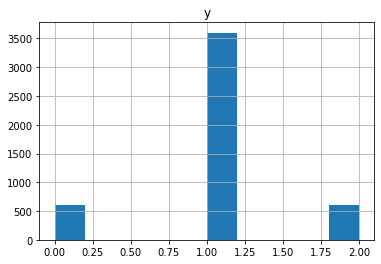

In [29]:
print(y.hist())
print(y.head())

In [86]:
# set apart a val set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(y_train)
X_1, y_1, X_2, y_2 = two_step_utils.transform(x_train,y_train)

      y
2611  0
2414  1
4305  1
2313  1
1873  1
...  ..
1319  0
3602  1
1294  1
988   1
4778  1

[3840 rows x 1 columns]


### check out the data in 2d with pca

1       21.622211
2       24.189701
3      -23.739551
4       25.063565
6       26.828870
          ...    
3834   -10.186682
3836    30.916535
3837   -16.653419
3838    31.096550
3839    18.489604
Name: 0, Length: 2878, dtype: float64


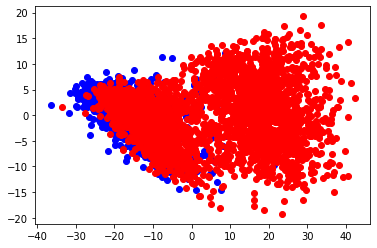

In [117]:
pca = PCA(n_components=2)
pca.fit(X_1)
X_pca = pca.transform(X_1)
X_pca = pd.DataFrame(X_pca)
idx_1 = np.where(y_1.y == 1)
idx_0 = np.where(y_1.y == 0)

class_1 = pd.DataFrame(X_pca.iloc[idx_1])
class_0 = pd.DataFrame(X_pca.iloc[idx_0])
print(class_1[0])

plt.scatter(class_0[0], class_0[1], c='b')
plt.scatter(class_1[0], class_1[1], c='r')
plt.show()

[[<AxesSubplot:title={'center':'y'}>]]
[[<AxesSubplot:title={'center':'y'}>]]


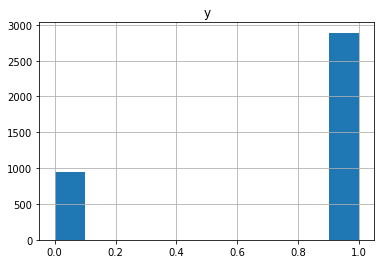

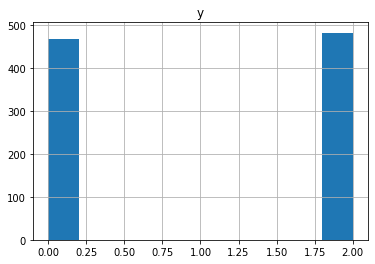

In [71]:
print(y_1.hist())
print(y_2.hist())

### TASK 1

### now oversample for the first task

In [79]:
X_1, y_1 = Data_Augmentation.smote_resampling(X_1, y_1)

[[<AxesSubplot:title={'center':'y'}>]]


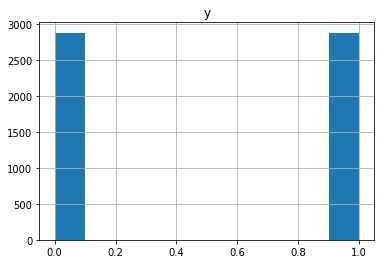

In [50]:
print(y_1.hist())

In [118]:
clf = SVC(class_weight='balanced', gamma='auto')
scores = cross_val_score(clf, X_1,y_1, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[0.82578125 0.83359375 0.80234375]
0.8205729166666668


In [119]:
log_clf = LogisticRegression(random_state=0)
scores = cross_val_score(log_clf, X_1,y_1, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

### TASK 2

In [52]:
clf_2 = SVC(class_weight='balanced', gamma='auto')
scores = cross_val_score(clf_2, X_2,y_2, cv=3, scoring= 'balanced_accuracy')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[0.71984934 0.7628912  0.73822828]
0.7403229428463032


### combine the two classifications:

In [80]:
# predict on everything and then set them together
# fit on data and check on val set
clf = clf.fit(X_1, y_1)
clf_2 = clf_2.fit(X_2, y_2)

y_pred_1 = clf.predict(x_val)
y_pred_2 = clf_2.predict(x_val)


/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [81]:
y_pred = two_step_utils.combine_predictions(y_pred_1, y_pred_2)
print(y_pred)

[2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [82]:
print(np.shape(y_pred_1))
print(np.shape(y_pred_2))
print(np.shape(y_pred))

(960,)
(960,)
(960,)


In [83]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.46      0.48       132
     class 1       0.88      0.87      0.88       710
     class 2       0.54      0.64      0.59       118

    accuracy                           0.79       960
   macro avg       0.64      0.66      0.65       960
weighted avg       0.79      0.79      0.79       960



In [84]:
BMAC = balanced_accuracy_score(y_val, y_pred)
print(BMAC)

0.6565151394585627


In [85]:
print(confusion_matrix(y_val, y_pred))

[[ 61  48  23]
 [ 51 619  40]
 [ 10  33  75]]
